In [2]:
print("4.Regression.ipynb")
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

print(sklearn.__version__)

4.Regression.ipynb
1.0.2


# 1. 회귀(Regression)

--------------
## 1-1. 회귀   
여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법   
예측값이 이산형인 분류와 달리 예측값이 연속형 숫자 값인 지도학습 방법이다.

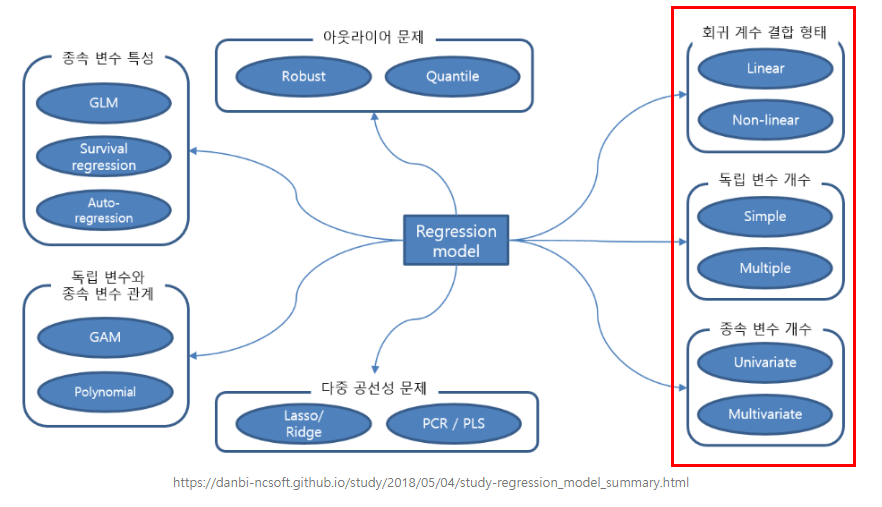

-----------
## 1-2. 선형 회귀 

단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형회귀 
$$\hat{y} = w_0 + w_1X_1$$ 
$$w_0,w_1 : 회귀계수$$
$$err = y - \hat{y}$$
$${err}^2 = RSS(Residual\; Sum\; of\; Square)$$ 


선형 회귀: 여러개의 독립변수들의 선형결합으로 하나의 종속변수를 예측하는 기법
$$\hat{y} = w_0 + w_1X_1 + \cdots + w_nX_n$$ 
$$w_0,w_1 \cdots w_n: 회귀계수$$
$$err = y - \hat{y}$$
$$Cost = RSS(w_0,w_1,\cdots ,w_n) = \frac{1}{N}\sum^{N}_{i=1}{(y_i - (w_0 + w_1X_1 + \cdots + w_nX_n))^2}$$

경사하강법(gradient descent):   
함수 값이 낮아지는 방향으로 독립 변수 값을 변형시켜가면서 최종적으로는 최소 함수 값을 갖도록 하는 독립 변수 값을 찾는 방법

경사하강법에는 미분계수 = 0를 직접 계산하는 방법보다 구현이 쉽고 미분계수 계산이 불가능한 함수에서도 사용가능 하다는 장점이 있다.

Step Size(학습률, learning rate):   
Cost function(비용함수)의 반대 경사 방향으로 정의된 그레디언트를 옮기는 크기   
step size가 너무 작을 경우 최솟값에 수렴하기 위해서 반복해야하는 학습이 너무 많아지고 지역 최솟값(local minimum)에 수렴할 수 있다.
step size 가 너무 클 경우에는 학습시간은 적게 걸리나, 전역 최솟값(global minumum)을 뛰어넘어 비용함수가 발산할 수 있다.
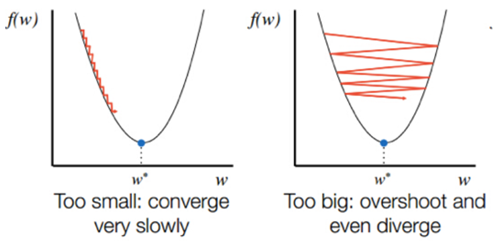

경사하강법의 단점:   
현재 위치에서의 기울기와 무작위 초기화를 사용하기 때문에 알고리즘이 local minimum에 빠질 수 있다. 또한 평탄한 지역을 지나기 위해서 시간이 오래 걸리고 일찍 멈추어 global minimum에 도달하지 못할 수 있다. 이를 해결하기 위해 momentum, adam 등 여러 optimizing 방법이 존재한다   
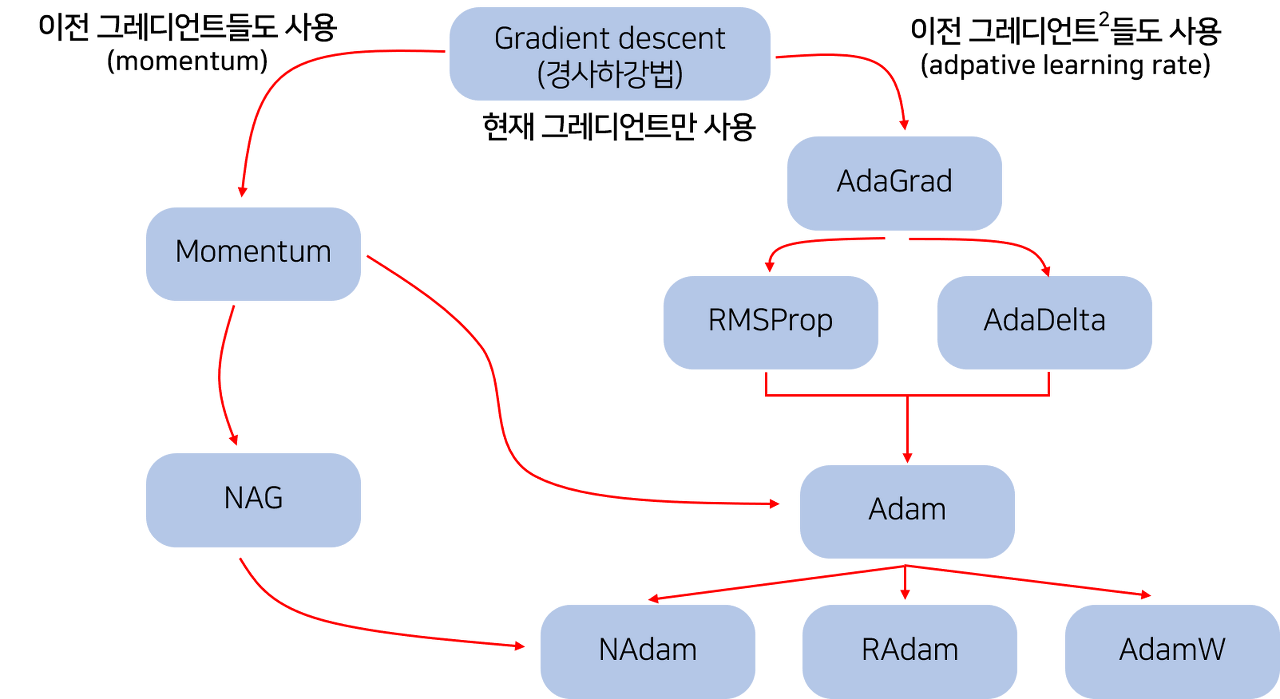   

https://dbstndi6316.tistory.com/297

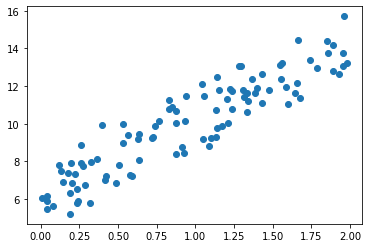

In [26]:
# python 경사하강법 구현하기

np.random.seed(0)
# y = 4X +6 근사
X = 2*np.random.rand(100,1)
y = 6+4*X +np.random.randn(100,1)

plt.scatter(X,y)

In [37]:
# 가중치 업데이트

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
  N = len(y)
  # 업데이트 배열 생성
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)

  # 선형결합으로 예측한 값과 실제값의 오차 계산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  # 그레디언트*learning_rate 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate * sum(diff)
  
  return w1_update, w0_update

In [32]:
# 초기화 iter만큼 경사하강법 수행
def gradient_descent_steps(X, y, iters = 10000):
  # 가중치 0으로 초기화
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  # iters 값만큼 경사하강법 반복수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate = 0.01) # 그레디언트
    # 가중치 업데이트
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1,w0

In [7]:
# 비용함수
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1:3.968467510701115 w0:6.2221510774471165
Cost: 0.9924386487246484


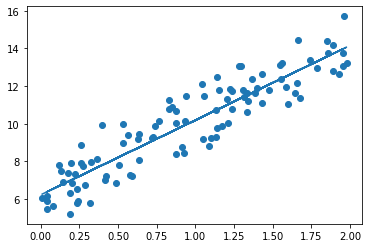

In [40]:
# y = 4X +6 선형회귀
w1, w0 = gradient_descent_steps(X,y)
print('w1:{0} w0:{1}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Cost: {0}'.format(get_cost(y,y_pred)))

plt.scatter(X,y)
plt.plot(X, y_pred)

In [42]:
# 확률적 경사 하강법(SGD)
def stochastic_gradient_descent_steps(X,y, batch_size = 10, iters = 1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  for ind in range(iters):
    np.random.seed(ind)
    # 전체 데이터에서 랜덤하게 batch_size만큼 추출
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index]
    sample_y = y[stochastic_random_index]

    # 그레디언트 업데이트
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X, sample_y, learning_rate = 0.01)
    w1 = w1- w1_update
    w0 = w0 - w0_update

  return w1, w0

w1:4.021813642697164 w0:6.162031224717461
Cost: 0.9934784315632568


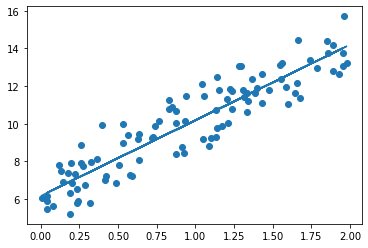

In [43]:
w1,w0 = stochastic_gradient_descent_steps(X,y)
print('w1:{0} w0:{1}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X +w0
print('Cost: {0}'.format(get_cost(y,y_pred)))

plt.scatter(X,y)
plt.plot(X, y_pred)